# Feature Selection

Feature Selection is the process where you automatically or manually select those features which contribute 
most to your prediction variable or output in which you are interested in. Having irrelevant features in your data 
can decrease the accuracy of the models and make your model learn based on irrelevant features.

We will explore two mostly used technique
1.Feature Importance
2.SelectKBest

In [1]:
#importing all importent libary

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv("credit card.csv") #dataset

In [3]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [4]:
df.shape

(30000, 25)

In [5]:
df.isnull().sum() #checking if have any null value

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [8]:
df = df.rename(columns = {'default.payment.next.month':'Payment'})

In [9]:
df.head() #after rename

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Payment
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
x = df.drop(['ID','Payment'],axis=1)

In [11]:
y = df[['Payment']]

In [12]:
y.value_counts()

Payment
0          23364
1           6636
dtype: int64

# Feature Importance: ExtraTreesClassifier()

Extra Trees Classifier: Extra Trees Classifier is an ensemble learning method fundamentally based on decision trees. 
ExtraTreesClassifier, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning 
from the data and overfitting

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
extr  = ExtraTreesClassifier()

In [15]:
extr.fit(x,y)

ExtraTreesClassifier()

In [16]:
extr.feature_importances_

array([0.06621741, 0.0120515 , 0.03240831, 0.02136847, 0.06685443,
       0.09734391, 0.0487113 , 0.0296346 , 0.03132947, 0.03222884,
       0.02889638, 0.0502193 , 0.04660709, 0.04511965, 0.04432714,
       0.04394898, 0.04393741, 0.04393635, 0.04271743, 0.04245312,
       0.04099833, 0.04250373, 0.04618686])

In [17]:
feature_importance = extr.feature_importances_

In [18]:
imp = pd.DataFrame(feature_importance,columns =['Gain_Score'] )

In [19]:
imp

,Gain_Score
0,0.066217
1,0.012051
2,0.032408
3,0.021368
4,0.066854
5,0.097344
6,0.048711
7,0.029635
8,0.031329
9,0.032229


In [20]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [21]:
cols1 = pd.DataFrame(x.columns,columns = ['Features_Name'])

In [22]:
cols1

,Features_Name
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE
5,PAY_0
6,PAY_2
7,PAY_3
8,PAY_4
9,PAY_5


In [23]:
gains = pd.concat ([cols1,imp],axis=1)

In [24]:
gains

,Features_Name,Gain_Score
0,LIMIT_BAL,0.066217
1,SEX,0.012051
2,EDUCATION,0.032408
3,MARRIAGE,0.021368
4,AGE,0.066854
5,PAY_0,0.097344
6,PAY_2,0.048711
7,PAY_3,0.029635
8,PAY_4,0.031329
9,PAY_5,0.032229


In [25]:
gains.nlargest(15,"Gain_Score")

,Features_Name,Gain_Score
5,PAY_0,0.097344
4,AGE,0.066854
0,LIMIT_BAL,0.066217
11,BILL_AMT1,0.050219
6,PAY_2,0.048711
12,BILL_AMT2,0.046607
22,PAY_AMT6,0.046187
13,BILL_AMT3,0.045120
14,BILL_AMT4,0.044327
15,BILL_AMT5,0.043949


In [26]:
gains.nsmallest(8,'Gain_Score')

,Features_Name,Gain_Score
1,SEX,0.012051
3,MARRIAGE,0.021368
10,PAY_6,0.028896
7,PAY_3,0.029635
8,PAY_4,0.031329
9,PAY_5,0.032229
2,EDUCATION,0.032408
20,PAY_AMT4,0.040998


In [27]:
newx = gains.nlargest(18,'Gain_Score')
newx

,Features_Name,Gain_Score
5,PAY_0,0.097344
4,AGE,0.066854
0,LIMIT_BAL,0.066217
11,BILL_AMT1,0.050219
6,PAY_2,0.048711
12,BILL_AMT2,0.046607
22,PAY_AMT6,0.046187
13,BILL_AMT3,0.045120
14,BILL_AMT4,0.044327
15,BILL_AMT5,0.043949


<AxesSubplot:>

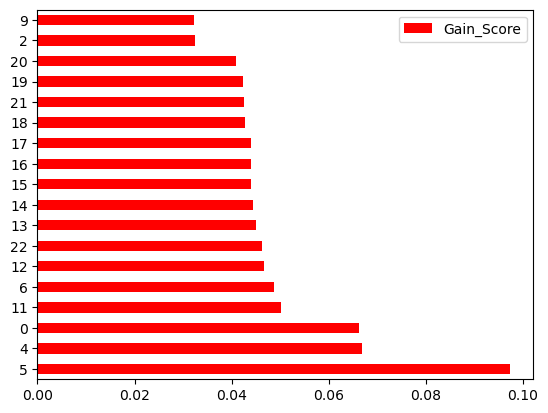

In [28]:
newx.plot(kind='barh',color=['red']) # barh mean horizontal

<AxesSubplot:>

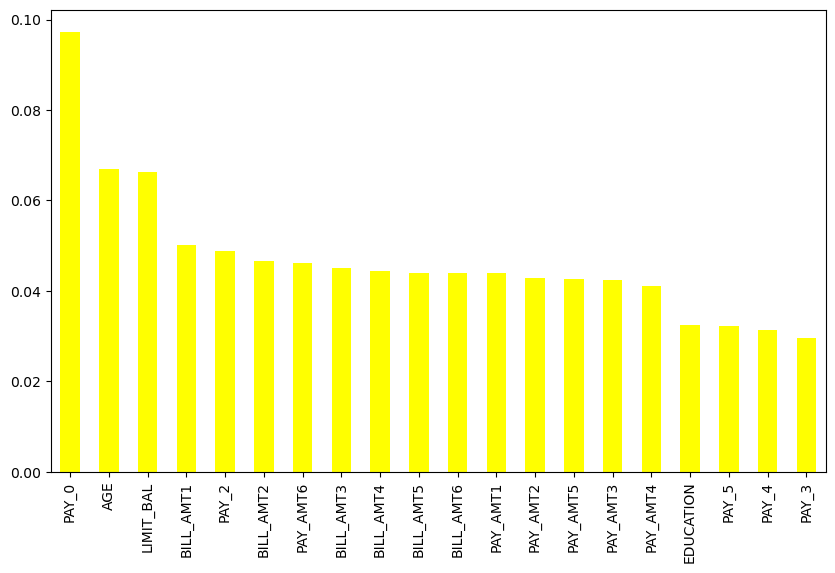

In [29]:
plt.figure(figsize=(10,6))
features = pd.Series(extr.feature_importances_, index = x.columns)
features.nlargest(20).plot(kind='bar', color='yellow')

<AxesSubplot:>

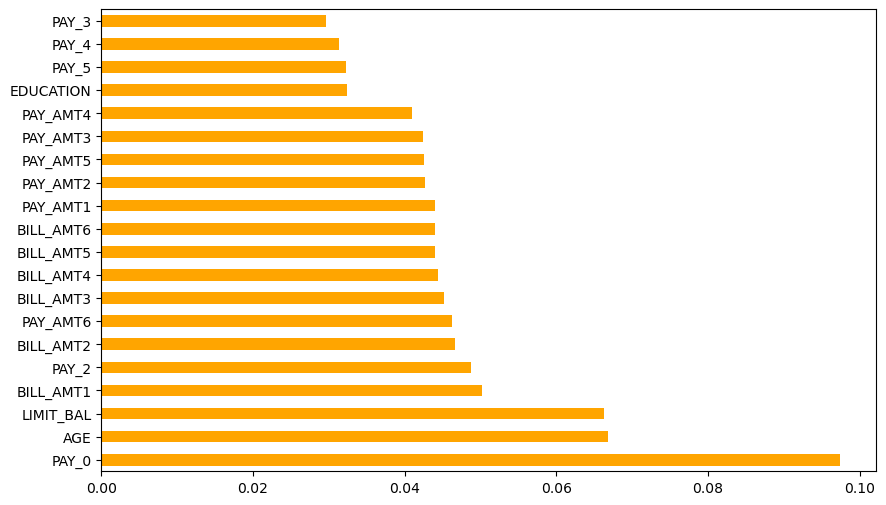

In [30]:
features = pd.Series(extr.feature_importances_, index = x.columns)
plt.figure(figsize=(10,6))
features.nlargest(20).plot(kind='barh', color='orange') #bar=vertical but barh = horizontal
#plt.savefig('score1.png')

In [31]:
x.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027


<AxesSubplot:>

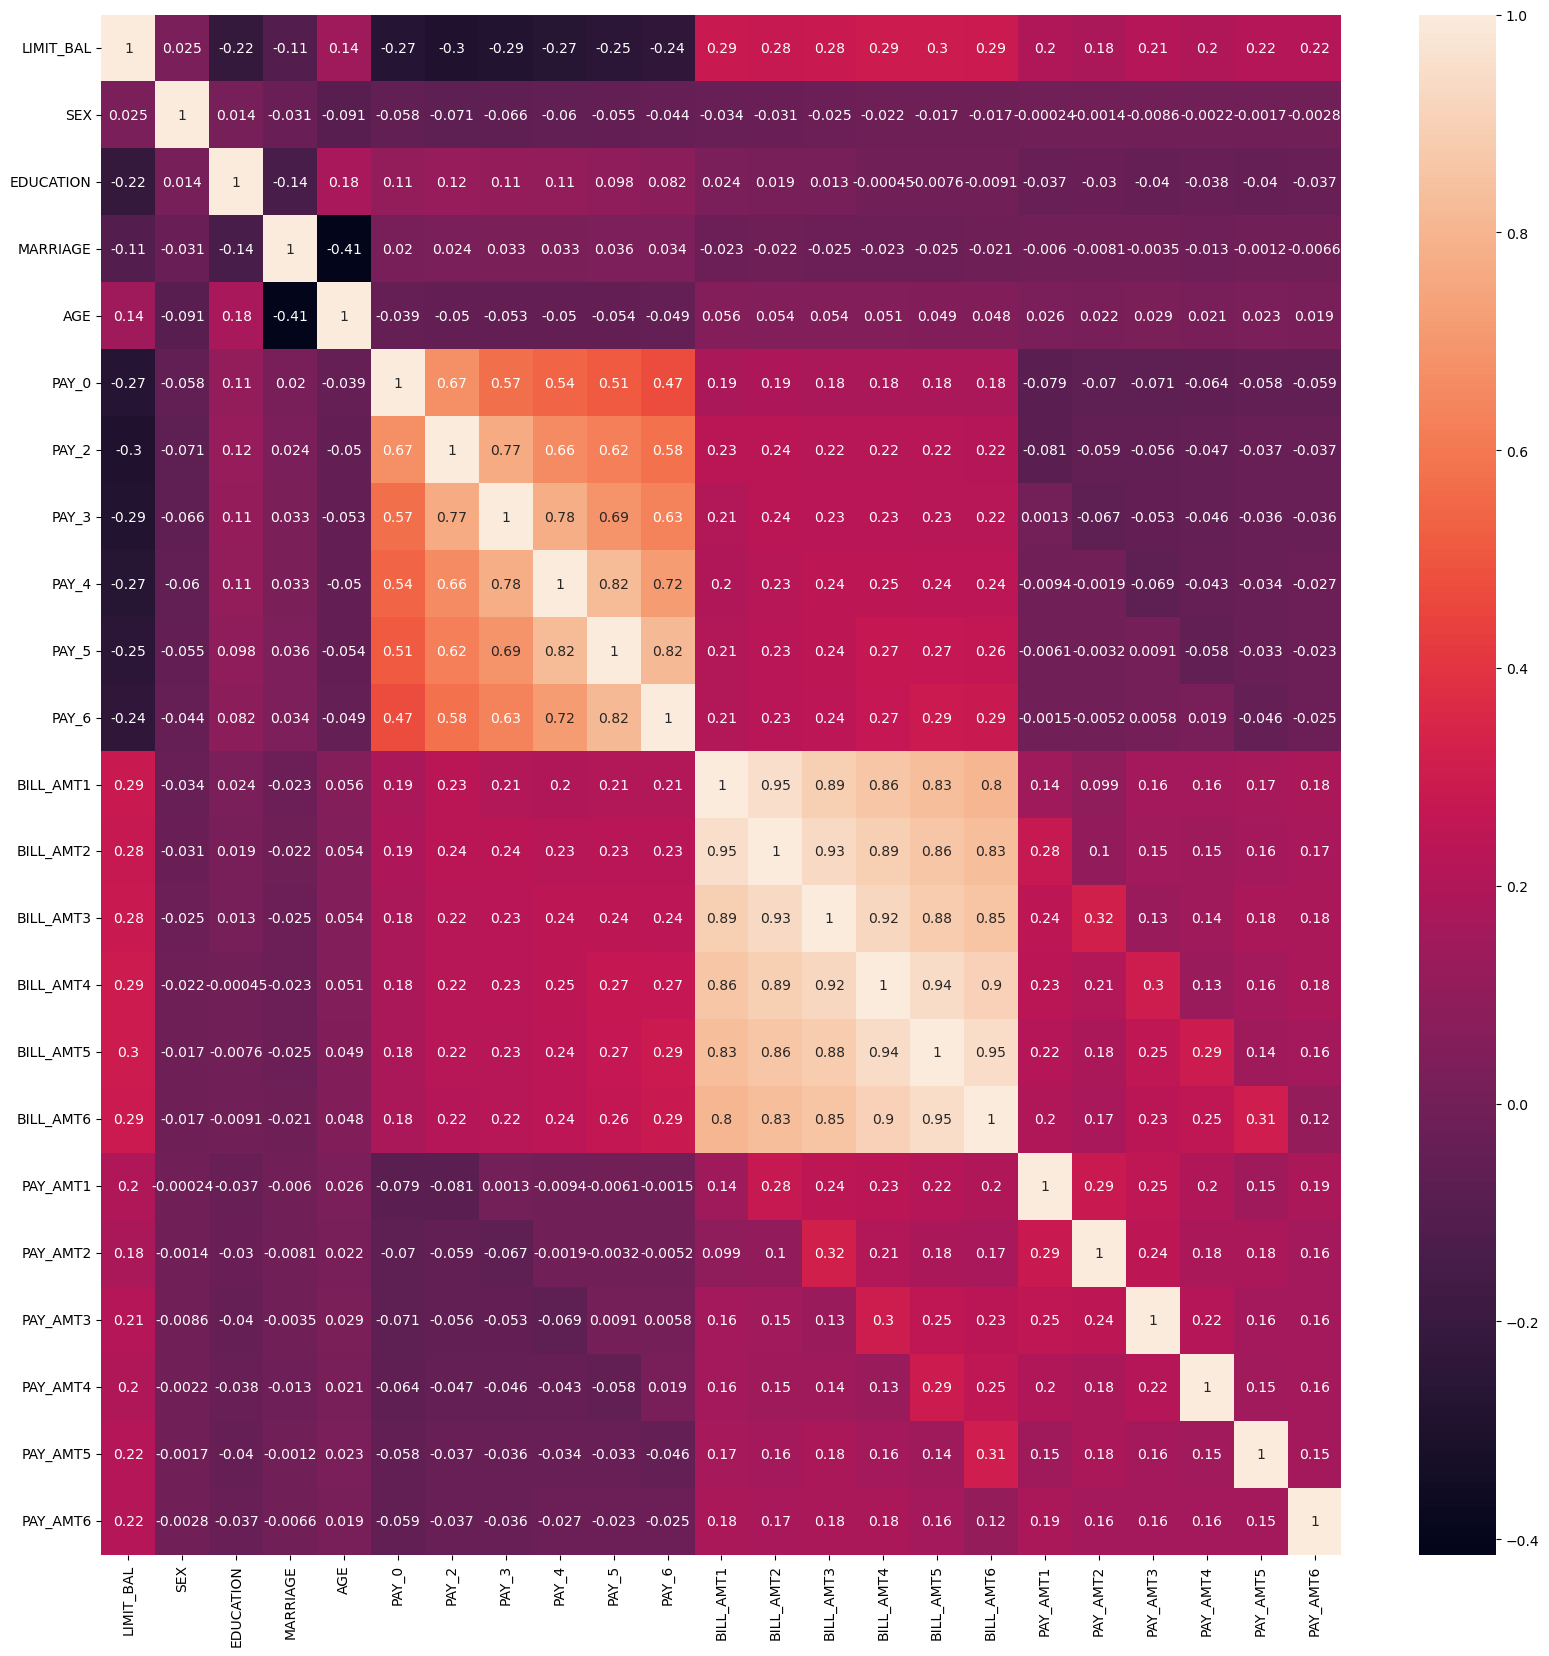

In [32]:
feature_names = x.columns #features name
colname = x.corr().index #features name
plt.figure(figsize=(20,20))
sns.heatmap(df[colname].corr(),annot=True)

# SelectKBest: Score Function

1. f_regression: Used only for numeric targets and based on linear regression performance.

2. f_classif: Used only for categorical targets and based on the Analysis of Variance (ANOVA) 
statistical test.

In [33]:
x1 = x.copy()

In [34]:
x1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [35]:
y1 = y.copy()

In [36]:
y1.head()

,Payment
0,1
1,1
2,0
3,0
4,0


In [37]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression #chi2 only when features are non negative

In [38]:
model2 = SelectKBest(score_func = f_classif)

In [39]:
featurer_score = model2.fit(x,y)

In [40]:
featurer_score.scores_

array([7.24068539e+02, 4.79788543e+01, 2.35471118e+01, 1.77812714e+01,
       5.78855582e+00, 3.53771497e+03, 2.23916914e+03, 1.75746644e+03,
       1.47684597e+03, 1.30459118e+03, 1.08540249e+03, 1.15805315e+01,
       6.04423789e+00, 5.94438771e+00, 3.09474518e+00, 1.37108740e+00,
       8.65820292e-01, 1.60403810e+02, 1.03291524e+02, 9.52180109e+01,
       9.71880005e+01, 9.14298008e+01, 8.50890453e+01])

In [41]:
cols2 = pd.DataFrame(featurer_score.scores_ , columns=['Feature_Scores'])
cols2

,Feature_Scores
0,724.068539
1,47.978854
2,23.547112
3,17.781271
4,5.788556
5,3537.714970
6,2239.169136
7,1757.466444
8,1476.845967
9,1304.591176


In [42]:
cols1

,Features_Name
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE
5,PAY_0
6,PAY_2
7,PAY_3
8,PAY_4
9,PAY_5


In [43]:
scores = pd.concat([cols1,cols2],axis=1)
scores

,Features_Name,Feature_Scores
0,LIMIT_BAL,724.068539
1,SEX,47.978854
2,EDUCATION,23.547112
3,MARRIAGE,17.781271
4,AGE,5.788556
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176


In [44]:
scores.nlargest(18,'Feature_Scores')

,Features_Name,Feature_Scores
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176
10,PAY_6,1085.402485
0,LIMIT_BAL,724.068539
17,PAY_AMT1,160.403810
18,PAY_AMT2,103.291524
20,PAY_AMT4,97.188000


In [45]:
df1 = df.drop(['LIMIT_BAL','EDUCATION','PAY_0'], axis=1)

In [46]:
df1.head()

,ID,SEX,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Payment
0,1,2,1,24,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,2,2,26,2,0,0,0,2,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,2,2,34,0,0,0,0,0,29239.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,2,1,37,0,0,0,0,0,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,1,1,57,0,-1,0,0,0,8617.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [47]:
df1.to_csv('new.csv')

In [48]:
df1.head()

,ID,SEX,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Payment
0,1,2,1,24,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,2,2,26,2,0,0,0,2,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,2,2,34,0,0,0,0,0,29239.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,2,1,37,0,0,0,0,0,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,1,1,57,0,-1,0,0,0,8617.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
